In [68]:
import import_ipynb
from ETL_EDA import df
import numpy as np
import plotly.express as px

In [69]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs # (projections)
# %matplotlib inline
from collections import Counter

In [70]:
state_counter = Counter()
city_counter = Counter()
for state in df.state_code:
    state_counter[state] += 1
for city in df.city:
    city_counter[city] += 1
# print(state_counter)
# print()
# print(city_counter)

In [71]:
contiguous_usa = gpd.read_file(
  gplt.datasets.get_path('contiguous_usa')
)
contiguous_usa = contiguous_usa.sort_values('state').reset_index(drop=True) # Alphabetize the states list
contiguous_usa.head(3)

,state,adm1_code,population,geometry
0,Alabama,USA-3541,4779736,"POLYGON ((-85.05442 31.10870, -85.00519 30.990..."
1,Arizona,USA-3520,6392017,"POLYGON ((-109.04523 36.99991, -109.04367 31.3..."
2,Arkansas,USA-3528,2915918,"POLYGON ((-89.66292 36.02307, -89.67351 35.940..."


In [72]:
url = ('https://raw.githubusercontent.com/'
       'jasonong/List-of-US-States/master/states.csv')
abbreviations = pd.read_csv(url)
abbreviations.head(3)

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ


In [73]:
zip_code_5 = [s[:5] for s in list(df.zip_code)]

In [74]:
zipcodes = pd.read_csv('free-zipcode-database-Primary.csv')
zipcodes = zipcodes[['Zipcode','Lat','Long','ZipCodeType','City','State']]

startup_states = list(state_counter.keys())
zipcodes = zipcodes.query('State in @startup_states')
zipcodes = pd.DataFrame(zipcodes)
z = list(zipcodes.Zipcode)
zipcodes = zipcodes.assign(Zipcode_string = [str(z[i]) for i in range(len(z))])
zipcodes

,Zipcode,Lat,Long,ZipCodeType,City,State,Zipcode_string
12,7675,40.98,-74.03,STANDARD,WESTWOOD,NJ,7675
13,7677,41.02,-74.05,STANDARD,WOODCLIFF LAKE,NJ,7677
14,7885,40.89,-74.58,STANDARD,WHARTON,NJ,7885
15,7981,40.82,-74.41,STANDARD,WHIPPANY,NJ,7981
16,7999,40.82,-74.41,STANDARD,WHIPPANY,NJ,7999
...,...,...,...,...,...,...,...
42507,98492,47.12,-122.55,STANDARD,TACOMA,WA,98492
42508,98667,45.63,-122.66,UNIQUE,VANCOUVER,WA,98667
42509,98929,46.74,-121.14,STANDARD,NACHES,WA,98929
42510,99165,46.73,-117.17,STANDARD,PULLMAN,WA,99165


In [75]:
df_merged = df.merge(zipcodes, left_on='zip_code', right_on='Zipcode_string')
df_merged

,state_code,latitude,longitude,zip_code,city,name,labels,founded_at,first_funding_at,last_funding_at,...,avg_participants,is_top500,status_closed,Zipcode,Lat,Long,ZipCodeType,City,State,Zipcode_string
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1,2007-01-01,2009-04-01,2010-01-01,...,1.0000,0,0,92101,32.71,-117.16,STANDARD,SAN DIEGO,CA,92101
1,CA,32.721834,-117.161797,92101,San Diego,Flud,0,2010-10-01,2011-04-13,2012-09-01,...,4.0000,1,1,92101,32.71,-117.16,STANDARD,SAN DIEGO,CA,92101
2,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1,2000-01-01,2005-02-14,2009-12-28,...,4.7500,1,0,95032,37.23,-121.95,STANDARD,LOS GATOS,CA,95032
3,CA,32.901049,-117.192656,92121,San Diego,Plixi,1,2009-03-18,2010-03-30,2010-03-30,...,4.0000,1,0,92121,32.90,-117.20,STANDARD,SAN DIEGO,CA,92121
4,CA,32.902266,-117.208340,92121,San Diego,Veoh,1,2004-01-01,2005-07-01,2008-06-03,...,5.0000,1,0,92121,32.90,-117.20,STANDARD,SAN DIEGO,CA,92121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,IL,41.808458,-88.073008,60188,Lisle,Univa UD,1,2004-05-10,2005-08-01,2010-03-23,...,5.3333,1,0,60188,41.91,-88.13,STANDARD,CAROL STREAM,IL,60188
891,TX,29.758938,-95.367697,77046,Houston,U.S. Fiduciary,0,2003-01-01,2007-04-12,2007-04-12,...,2.0000,1,1,77046,29.76,-95.38,STANDARD,HOUSTON,TX,77046
892,TX,29.739322,-95.444747,77027,Houston,Rudder,0,2006-10-01,2008-01-15,2008-01-15,...,1.0000,0,1,77027,29.76,-95.38,STANDARD,HOUSTON,TX,77027
893,WI,43.090756,-89.522805,53562,Middleton,Sway,0,2004-12-03,2010-01-19,2010-01-19,...,2.0000,0,1,53562,43.10,-89.50,STANDARD,MIDDLETON,WI,53562


___The original dataset had 922 rows, so we should try to account for the missing 27 rows.___

In [76]:
lat_diffs = list(df_merged.assign(lat_diff = df_merged.latitude - df_merged.Lat)['lat_diff'])
long_diffs = list(df_merged.assign(long_diff = df_merged.longitude - df_merged.Long)['long_diff'])
# print(lat_diffs)
# print()
# print(long_diffs)
print(len([x for x in lat_diffs if x**2 > 1]))
print(len([x for x in long_diffs if x**2 > 1]))

45
48


There are approximately 45 misclassified latitudes and approixmately 48 misclassified longitudes. Good thing we caught these!

In [77]:
df_short = df_merged[['state_code','city','zip_code','Lat','Long','name','status_closed']]
df_short.head()

,state_code,city,zip_code,Lat,Long,name,status_closed
0,CA,San Diego,92101,32.71,-117.16,Bandsintown,0
1,CA,San Diego,92101,32.71,-117.16,Flud,1
2,CA,Los Gatos,95032,37.23,-121.95,TriCipher,0
3,CA,San Diego,92121,32.90,-117.20,Plixi,0
4,CA,San Diego,92121,32.90,-117.20,Veoh,0


In [78]:
gdf = (contiguous_usa
      .merge(abbreviations, left_on='state', right_on='State')
      .merge(df_short, left_on='Abbreviation', right_on='state_code'))

gdf = gdf.drop(['adm1_code','population','State','state_code'], axis=1)
gdf.head(2)

,state,geometry,Abbreviation,city,zip_code,Lat,Long,name,status_closed
0,Arizona,"POLYGON ((-109.04523 36.99991, -109.04367 31.3...",AZ,Tempe,85281,33.43,-111.91,FetchBack,0
1,Arizona,"POLYGON ((-109.04523 36.99991, -109.04367 31.3...",AZ,Tempe,85284,33.33,-111.93,Andigilog,1


In [79]:
df_by_state = gdf.groupby('state').agg('mean').reset_index().drop(['Lat','Long'], axis=1)

startup_count = list(gdf.groupby('state').agg('count').reset_index().drop(['Lat','Long'], axis=1).status_closed)
# print(startup_count)
df_by_state = df_by_state.assign(total = startup_count)
df_by_state = df_by_state.assign(success_rt = 1-df_by_state.status_closed).drop('status_closed', axis=1)
df_by_state.head()

,state,total,success_rt
0,Arizona,2,0.500000
1,Arkansas,1,0.000000
2,California,467,0.676660
3,Colorado,19,0.736842
4,Connecticut,4,0.000000


In [80]:
gdf_by_state = df_by_state.merge(contiguous_usa, left_on='state', right_on='state').drop(['adm1_code','population'], axis=1)
gdf_by_state = gpd.GeoDataFrame(gdf_by_state)
gdf_by_state.head()

,state,total,success_rt,geometry
0,Arizona,2,0.500000,"POLYGON ((-109.04523 36.99991, -109.04367 31.3..."
1,Arkansas,1,0.000000,"POLYGON ((-89.66292 36.02307, -89.67351 35.940..."
2,California,467,0.676660,"POLYGON ((-114.35490 34.46467, -114.16597 34.2..."
3,Colorado,19,0.736842,"POLYGON ((-102.05017 40.00082, -102.04012 38.4..."
4,Connecticut,4,0.000000,"POLYGON ((-72.87617 41.22056, -73.64789 40.953..."


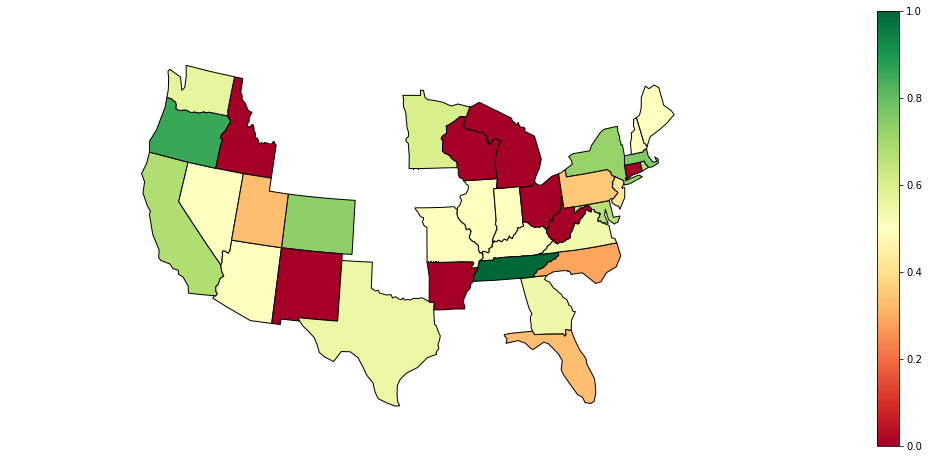

In [81]:
gplt.choropleth(
    gdf_by_state,
    hue='success_rt',
    cmap='RdYlGn',
    edgecolor='Black',
    legend=True,
    projection=gcrs.AlbersEqualArea(),
    figsize=(20, 8)
)

In [82]:
gdf.head()

,state,geometry,Abbreviation,city,zip_code,Lat,Long,name,status_closed
0,Arizona,"POLYGON ((-109.04523 36.99991, -109.04367 31.3...",AZ,Tempe,85281,33.43,-111.91,FetchBack,0
1,Arizona,"POLYGON ((-109.04523 36.99991, -109.04367 31.3...",AZ,Tempe,85284,33.33,-111.93,Andigilog,1
2,Arkansas,"POLYGON ((-89.66292 36.02307, -89.67351 35.940...",AR,Little Rock,72201,34.72,-92.35,JavaJobs,1
3,California,"POLYGON ((-114.35490 34.46467, -114.16597 34.2...",CA,San Diego,92101,32.71,-117.16,Bandsintown,0
4,California,"POLYGON ((-114.35490 34.46467, -114.16597 34.2...",CA,San Diego,92101,32.71,-117.16,Flud,1


In [83]:
gdf_pts = gdf.assign(geometry=gpd.points_from_xy(gdf.Long, gdf.Lat))
gdf_pts.drop('geometry', axis=1)
gdf_pts

,state,geometry,Abbreviation,city,zip_code,Lat,Long,name,status_closed
0,Arizona,POINT (-111.91000 33.43000),AZ,Tempe,85281,33.43,-111.91,FetchBack,0
1,Arizona,POINT (-111.93000 33.33000),AZ,Tempe,85284,33.33,-111.93,Andigilog,1
2,Arkansas,POINT (-92.35000 34.72000),AR,Little Rock,72201,34.72,-92.35,JavaJobs,1
3,California,POINT (-117.16000 32.71000),CA,San Diego,92101,32.71,-117.16,Bandsintown,0
4,California,POINT (-117.16000 32.71000),CA,San Diego,92101,32.71,-117.16,Flud,1
...,...,...,...,...,...,...,...,...,...
890,Washington,POINT (-122.12000 47.68000),WA,Redmond,98052,47.68,-122.12,Sampa,1
891,Washington,POINT (-122.14000 47.55000),WA,Bellevue,98006,47.55,-122.14,Napera Networks,0
892,Washington,POINT (-122.20000 47.79000),WA,Bothell,98021,47.79,-122.20,Dexterra,0
893,West Virginia,POINT (-77.88000 39.38000),WV,Kearneysville,25430,39.38,-77.88,Plethora Technology,1


In [84]:
gdf_pts = gdf_pts.assign(status_acquired = 1 - gdf_pts.status_closed)

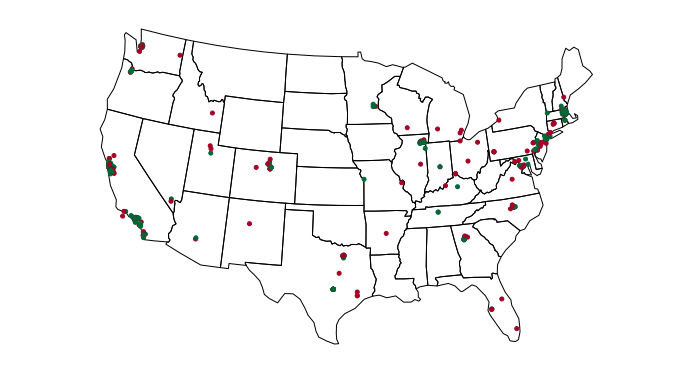

In [85]:
ax = gplt.polyplot(
    contiguous_usa,
    projection=gcrs.AlbersEqualArea(),
    figsize=(12,12)
)

gplt.pointplot(gdf_pts,
               ax=ax,
               hue='status_acquired',
               cmap='RdYlGn',
               scale='status_acquired', limits=(4,4))


In [86]:
top_5 = dict((df['state_code'].value_counts())[:5])
print(top_5)

{'CA': 487, 'NY': 106, 'MA': 83, 'TX': 42, 'WA': 42}


In [87]:
status = ['closed' if entry == 1 else 'acquired' for entry in df.status_closed]
df2 = df.assign(status = status).drop('status_closed', axis=1)
df2[['relationships', 'funding_rounds', 'status']]

,relationships,funding_rounds,status
0,3,3,acquired
1,9,4,acquired
2,5,1,acquired
3,5,3,acquired
4,2,2,closed
...,...,...,...
918,9,1,acquired
919,1,3,closed
920,5,1,closed
921,12,2,acquired


In [88]:
grouped_by_state = df2.groupby('state_code')

top_5_dfs = []
figure_dict_strip = {}
figure_dict_scatter = {}
figure_dict_density_contour = {}
    


for name in top_5.keys():
    state_df = grouped_by_state.get_group(name)
    top_5_dfs.append(state_df)
    sub_state_df = state_df[['state_code','relationships', 'funding_rounds', 'status']]
    
    fig = px.scatter(sub_state_df, 
                     x='relationships', 
                     y='funding_rounds', 
                     color='status', 
                     color_discrete_map={'acquired':'green', 'closed':'red'}, 
                     title=name, 
                     opacity=0.3, 
                     log_x=False, 
                     log_y=False
                    )
    figure_dict_scatter[name] = fig
    
    

Show California's chart just as an example:

In [89]:
figure_dict_scatter['CA'].show()

In [90]:
app.layout = html.Div([
    dcc.Tabs([
        dcc.Tab(label='CA', children=[
            dcc.Graph(
                figure = figure_dict_scatter['CA']
            )
        ]),
        dcc.Tab(label='NY', children=[
            dcc.Graph(
                figure = figure_dict_scatter['NY']
            )
        ]),
        dcc.Tab(label='MA', children=[
            dcc.Graph(
                figure = figure_dict_scatter['MA']
            )
        ]),
        dcc.Tab(label='WA', children=[
            dcc.Graph(
                figure = figure_dict_scatter['WA']
            )
        ]),
        dcc.Tab(label='TX', children=[
            dcc.Graph(
                figure = figure_dict_scatter['TX']
            )
        ]),
    ])
])

NameError: name 'html' is not defined

In [ ]:
figure_dict_scatter['CA'].write_html("public/html/scatter_CA.html")
figure_dict_scatter['NY'].write_html("public/html/scatter_NY.html")
figure_dict_scatter['MA'].write_html("public/html/scatter_MA.html")
figure_dict_scatter['WA'].write_html("public/html/scatter_WA.html")
figure_dict_scatter['TX'].write_html("public/html/scatter_TX.html")